In [1]:
import os
import joblib
import pickle

import pandas as pd
import numpy as np

from utils_visualize import (
    get_result_table,
    plot_heatmap
)

pd.options.display.max_rows = 100

In [2]:
artifacts_fpath = '/local-scratch/nigam/projects/lguo/temp_ds_shift_robustness/dg/experiments/baseline/artifacts'

## MODEL PERFORMANCE AND ROBUSTNESS

In [3]:
cmap = 'viridis'

y_axis = {
    'auc':{
        'lim':[-0.15, 0],
        'lim_raw':[0.75,.85],
        'label':'AUROC'
    },
    'auprc':{
        'lim':[-0.15, 0],
        'lim_raw':[.15,.35],
        'label':'AUPRC'
    },
    'ace_abs_logistic_logit':{
        'lim':[0, 0.10],
        'lim_raw':[0,0.05],
        'label':'Calibration'
    },
    'loss_bce':{
        'lim':[0, 0.4],
        'label':'BCE Loss'
    }
}

metrics = {
    'auc':'AUROC',
    'auprc':'AUPRC',
    'ace_abs_logistic_logit':'Calibration',
}

tasks = {
    'hospital_mortality':'In-Hospital Mortality',
    'LOS_7':'LOS > 7 Days',
    'readmission_30':'Readmission in 30 Days',
    'icu_admission':'Admission to ICU'
}

train_years = {
    '2018':'18-18',
    '2017_2018':'17-18',
    '2016_2017_2018':'16-18',
    '2015_2016_2017_2018':'15-18',
    '2014_2015_2016_2017_2018':'14-18',
    '2013_2014_2015_2016_2017_2018':'13-18',
    '2012_2013_2014_2015_2016_2017_2018':'12-18',
    '2011_2012_2013_2014_2015_2016_2017_2018':'11-18',
    '2010_2011_2012_2013_2014_2015_2016_2017_2018':'10-18',
    '2009_2010_2011_2012_2013_2014_2015_2016_2017_2018':'09-18',
}

#### ID Performance

In [4]:
df = get_result_table(artifacts_fpath,train_years,tasks,metrics)
print("ID Performance of Models Trained on Various Year Groups With Increasing Sample Size and Diversity")
display(df[[v for k,v in train_years.items()]])

ID Performance of Models Trained on Various Year Groups With Increasing Sample Size and Diversity


Train Group                                        18-18  \
Task                   Metric                              
In-Hospital Mortality  AUROC        0.807 (0.758, 0.848)   
                       AUPRC        0.103 (0.066, 0.152)   
                       Calibration  0.007 (0.004, 0.011)   
LOS > 7 Days           AUROC        0.776 (0.757, 0.795)   
                       AUPRC        0.438 (0.396, 0.479)   
                       Calibration  0.012 (0.004, 0.021)   
Readmission in 30 Days AUROC        0.764 (0.728, 0.801)   
                       AUPRC        0.256 (0.196, 0.323)   
                       Calibration  0.008 (0.003, 0.015)   
Admission to ICU       AUROC        0.844 (0.822, 0.867)   
                       AUPRC         0.33 (0.275, 0.397)   
                       Calibration   0.01 (0.005, 0.017)   

Train Group                                        17-18  \
Task                   Metric                              
In-Hospital Mortality  AUROC        0.833 (0.801, 0.863)   
                       AUPRC         0.116 (0.08, 0.158)   
                       Calibration  0.004 (0.003, 0.007)   
LOS > 7 Days           AUROC        0.789 (0.775, 0.801)   
                       AUPRC        0.455 (0.425, 0.486)   
                       Calibration  0.008 (0.003, 0.015)   
Readmission in 30 Days AUROC        0.782 (0.756, 0.807)   
                       AUPRC        0.256 (0.206, 0.305)   
                       Calibration  0.004 (0.002, 0.009)   
Admission to ICU       AUROC        0.866 (0.849, 0.882)   
                       AUPRC        0.392 (0.344, 0.441)   
                       Calibration   0.005 (0.002, 0.01)   

Train Group                                        16-18  \
Task                   Metric                              
In-Hospital Mortality  AUROC        0.839 (0.815, 0.865)   
                       AUPRC        0.112 (0.085, 0.146)   
                       Calibration  0.003 (0.002, 0.006)   
LOS > 7 Days           AUROC         0.801 (0.79, 0.812)   
                       AUPRC        0.477 (0.452, 0.504)   
                       Calibration   0.005 (0.002, 0.01)   
Readmission in 30 Days AUROC        0.793 (0.772, 0.813)   
                       AUPRC         0.25 (0.211, 0.294)   
                       Calibration  0.004 (0.002, 0.008)   
Admission to ICU       AUROC         0.874 (0.86, 0.887)   
                       AUPRC        0.408 (0.365, 0.448)   
                       Calibration  0.004 (0.001, 0.007)   

Train Group                                        15-18  \
Task                   Metric                              
In-Hospital Mortality  AUROC        0.839 (0.817, 0.861)   
                       AUPRC        0.126 (0.096, 0.161)   
                       Calibration  0.003 (0.002, 0.005)   
LOS > 7 Days           AUROC         0.801 (0.791, 0.81)   
                       AUPRC        0.474 (0.453, 0.497)   
                       Calibration  0.005 (0.002, 0.009)   
Readmission in 30 Days AUROC        0.802 (0.785, 0.818)   
                       AUPRC        0.248 (0.213, 0.287)   
                       Calibration  0.003 (0.002, 0.006)   
Admission to ICU       AUROC        0.874 (0.863, 0.885)   
                       AUPRC        0.404 (0.368, 0.438)   
                       Calibration  0.002 (0.001, 0.005)   

Train Group                                        14-18  \
Task                   Metric                              
In-Hospital Mortality  AUROC        0.836 (0.815, 0.855)   
                       AUPRC        0.108 (0.087, 0.136)   
                       Calibration  0.004 (0.002, 0.005)   
LOS > 7 Days           AUROC          0.8 (0.791, 0.809)   
                       AUPRC        0.466 (0.446, 0.486)   
                       Calibration  0.005 (0.002, 0.009)   
Readmission in 30 Days AUROC        0.795 (0.778, 0.812)   
                       AUPRC        0.252 (0.221, 0.285)   
                       Calibration  

#### Heat Map OOD Performance in 2019, 2020, and 2021

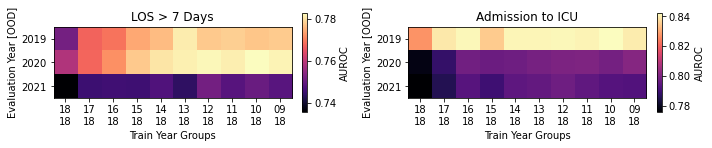

In [6]:
tasks = {
    'LOS_7':'LOS > 7 Days',
    'icu_admission':'Admission to ICU'
}

plot_heatmap(
    artifacts_fpath=artifacts_fpath,
    train_years=train_years,
    tasks=tasks,
    y_axis='auto',
    dv='comparator',
    figsize=(10,2)
)